Aluno: Guilherme de Oliveira Mendes
Matrícula:180113496

## Objetive

build a linear model and neural net from scratch to know how many passengers have been transported to another dimension in the scenario presented in the kaggle competition Space-Titanic

## Cleaning the data

first it is downloaded the relevant data fromkaggle and then set it to be used by the notebook

In [149]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/spaceship-titanic')

after it is imported the tools that will be used and a small modification to make sure that they will use the screen properly

In [150]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

here it is the data tha will be used in this case the objective is that the titanic is a  interstellar space-ship taking almost 13.000 people from three home-planets(Europa,Mars,Earth) to three other destinatons(TRAPPIST-1e,PSO J318.5-22,55 Cancri e),but while in its way for its first destination it collided with a spacetime anomaly hidden within a dust cloud, and though the ship stayed intact, almost half of the passengers were transported to an alternate dimension.

In [151]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


the data used contain certain information of its passengers like ther name, age, homeplanet, destination, their passenger id, if they were in cyrosleep or not in the moment of the collision, if they were VIP or not, how much they spend in certain services aboard the ship like the foodcourt,spa and the VR deck, and by last their ultiamte fate 

after that it is checked how much data is missing from the colunms, since we cant create the model with no datas in the colunms

In [152]:
df.isna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [153]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

as we can see there is a lot of missing data, to use it is necessary to fill these empty places, for this it will be used the function `mode` but a problem is that it returns more than one row in the case of ties, so we will just take the first row with `iloc[0]`: 

In [154]:
modes = df.mode().iloc[0]
modes

PassengerId                0001_01
HomePlanet                   Earth
CryoSleep                    False
Cabin                      G/734/S
Destination            TRAPPIST-1e
Age                           24.0
VIP                          False
RoomService                    0.0
FoodCourt                      0.0
ShoppingMall                   0.0
Spa                            0.0
VRDeck                         0.0
Name            Alraium Disivering
Transported                   True
Name: 0, dtype: object

after the mode is done, `fillna` will be used to replace the missing values with the mode of each column, repalcing them with 0

In [155]:
df.fillna(modes, inplace=True)

after that the code `df.isna().sum()` will be run again the code to see if there is still any empty value in the data

In [156]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

after checking if there is no empty space we will use `describe()` to describe all of the numeric valuables

In [157]:
df.describe(include=(np.number))

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


as we can see some of the values have a huge disparity in numbers and this can affect the model negatively, to have a better of view of this disparity we will use the function `hist` 

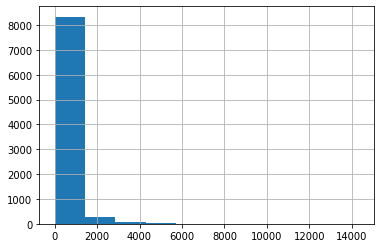

In [158]:
df['RoomService'].hist();

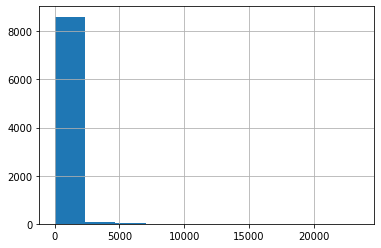

In [159]:
df['ShoppingMall'].hist();

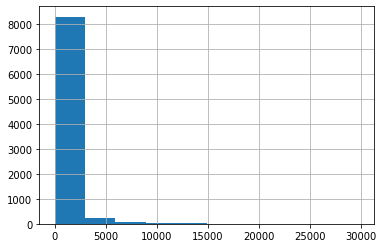

In [160]:
df['FoodCourt'].hist();

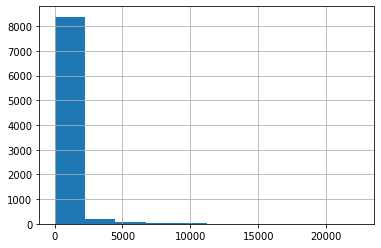

In [161]:
df['Spa'].hist();

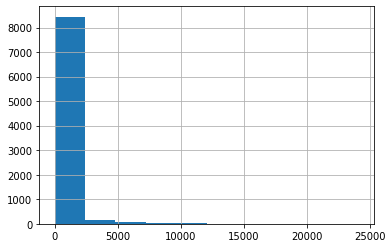

In [162]:
df['VRDeck'].hist();

to mellow out these extremes it will be used the function `log` making them better in the  model, as you can see bellow the disparty of values has been less extreme than before  

In [163]:
df['LogRoomService'] = np.log(df['RoomService']+1)
df['LogShoppingMall'] = np.log(df['ShoppingMall']+1)
df['LogFoodCourt'] = np.log(df['FoodCourt']+1)
df['LogSpa'] = np.log(df['Spa']+1)
df['LogVRDeck'] = np.log(df['VRDeck']+1)

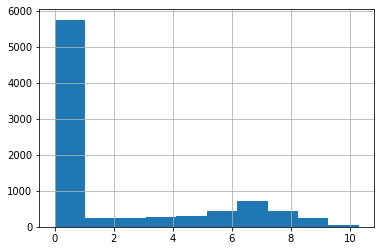

In [164]:
df['LogFoodCourt'].hist();

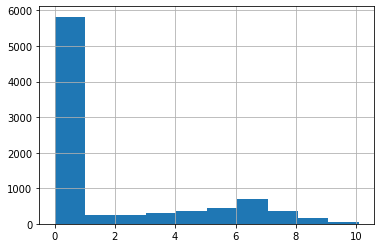

In [165]:
df['LogVRDeck'].hist();

`describe` can also be used to see how much variables have certain columns

In [166]:
df.describe(include=[object])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8693
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Alraium Disivering
freq,1,4803,207,6097,202


aas you can see in this example above the columns, name,cabin and id have a lot of variables to be properly used in our model and homeplanet and destination must be broken down so that they can be used, for this the function `get_dummies` from pandas can be used to break down each option into their own column, we will also be using the function `.astype()` to turn the boolean variables from transported,cyrosleep and vip into booleans becaue if we dont our model will not work

In [167]:
df = pd.get_dummies(df, columns=["HomePlanet","Destination",])
df["Transported"] = df["Transported"].astype(float)
df["CryoSleep"] = df["CryoSleep"].astype(float)
df["VIP"] = df["VIP"].astype(float)
df.columns


Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'LogRoomService', 'LogShoppingMall', 'LogFoodCourt', 'LogSpa', 'LogVRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

as you can see above a few colunms have benn added and bellow you can see the first rows of them

In [168]:
added_cols = ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', ]
df[added_cols].head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,1,0,0,0,1
1,1,0,0,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,1,0,0,0,0,1


Now it is possible to create the independent (predictors) and dependent (target) variables.both must be PyTorch tensors for it to work. in this dataset the dependent variable is `Transported`

In [169]:
from torch import tensor
t_dep = tensor(df.Transported)


the independent variables are all the continuous variables of interest plus all the dummy variables just created

In [170]:
indep_cols = ['Age', 'LogRoomService', 'LogShoppingMall', 'LogFoodCourt', 'LogSpa', 'LogVRDeck','CryoSleep','VIP' ] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[39.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  4.7005,  3.2581,  2.3026,  6.3099,  3.8067,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [58.0000,  3.7842,  0.0000,  8.1823,  8.8122,  3.9120,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [33.0000,  0.0000,  5.9189,  7.1577,  8.1107,  5.2679,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [16.0000,  5.7170,  5.0239,  4.2627,  6.3386,  1.0986,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [44.0000,  0.0000,  0.0000,  6.1821,  5.6768,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [26.0000,  3.7612,  1.3863,  7.3395,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [32.0000,  0.6931,  0.0000,

below we can see one of the most importants values of a tensor: its shape which is how many columns and rows does it have

In [171]:
t_indep.shape

torch.Size([8693, 14])

below we can also see the rank of the tensor which is how many dimensions or axes it has, vector has one, matrix has 2 and so forth

In [172]:
len(t_indep.shape)

2

## Setting up a linear model

Now that a matrix of independent variables and a dependent variable vector have been created, we can calculate our predictions and our loss. In this section, the first model will be a linear model. for this it will be necessary a coefficient for each column in `t_indep`. using random numbers in the range `(-0.5,0.5)`, a manual seed will be used so that other people using this notebook can have a consistent result with what it will be said in this notebook

In [173]:
torch.manual_seed(445)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([ 0.1749, -0.2797,  0.3053, -0.2786,  0.3501,  0.0145,  0.4881, -0.3446,  0.2721, -0.3622,  0.0168,  0.4570,  0.4936, -0.0638])

the predictions will be calculated by multiplying each row by the coefficients, and adding them up.

In [174]:
t_indep*coeffs

tensor([[ 6.8224, -0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000, -0.0000,  0.0000, -0.3622,  0.0000,  0.0000,  0.0000, -0.0638],
        [ 4.1984, -1.3150,  0.9948, -0.6414,  2.2093,  0.0551,  0.0000, -0.0000,  0.2721, -0.0000,  0.0000,  0.0000,  0.0000, -0.0638],
        [10.1461, -1.0586,  0.0000, -2.2794,  3.0855,  0.0566,  0.0000, -0.3446,  0.0000, -0.3622,  0.0000,  0.0000,  0.0000, -0.0638],
        [ 5.7728, -0.0000,  1.8073, -1.9940,  2.8398,  0.0762,  0.0000, -0.0000,  0.0000, -0.3622,  0.0000,  0.0000,  0.0000, -0.0638],
        [ 2.7989, -1.5993,  1.5340, -1.1875,  2.2194,  0.0159,  0.0000, -0.0000,  0.2721, -0.0000,  0.0000,  0.0000,  0.0000, -0.0638],
        [ 7.6970, -0.0000,  0.0000, -1.7222,  1.9876,  0.0000,  0.0000, -0.0000,  0.2721, -0.0000,  0.0000,  0.0000,  0.4936, -0.0000],
        [ 4.5482, -1.0522,  0.4233, -2.0446,  0.0000,  0.0000,  0.0000, -0.0000,  0.2721, -0.0000,  0.0000,  0.0000,  0.0000, -0.0638],
        ...,
        [ 5.5978, -0.1939,  0.0000,

as you can see the sums of each row are being dominated by the first column, which is `Age`, since that's bigger on average than all the others.

To make the columns contain numbers from `0` to `1`, it will be necessary to divide each column by its `max()`, since for this process we need the maximun over the rolls it is necessary we put `dim=0`

In [175]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [176]:
t_indep*coeffs

tensor([[ 0.0864, -0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000, -0.0000,  0.0000, -0.3622,  0.0000,  0.0000,  0.0000, -0.0638],
        [ 0.0531, -0.1374,  0.0988, -0.0623,  0.2206,  0.0055,  0.0000, -0.0000,  0.2721, -0.0000,  0.0000,  0.0000,  0.0000, -0.0638],
        [ 0.1284, -0.1106,  0.0000, -0.2212,  0.3080,  0.0056,  0.0000, -0.3446,  0.0000, -0.3622,  0.0000,  0.0000,  0.0000, -0.0638],
        [ 0.0731, -0.0000,  0.1796, -0.1935,  0.2835,  0.0075,  0.0000, -0.0000,  0.0000, -0.3622,  0.0000,  0.0000,  0.0000, -0.0638],
        [ 0.0354, -0.1671,  0.1524, -0.1153,  0.2216,  0.0016,  0.0000, -0.0000,  0.2721, -0.0000,  0.0000,  0.0000,  0.0000, -0.0638],
        [ 0.0974, -0.0000,  0.0000, -0.1672,  0.1984,  0.0000,  0.0000, -0.0000,  0.2721, -0.0000,  0.0000,  0.0000,  0.4936, -0.0000],
        [ 0.0576, -0.1099,  0.0421, -0.1985,  0.0000,  0.0000,  0.0000, -0.0000,  0.2721, -0.0000,  0.0000,  0.0000,  0.0000, -0.0638],
        ...,
        [ 0.0709, -0.0203,  0.0000,

now it is possible to create predictions from the linear model, by adding up the rows of the product as you can see the first 10 predictions

In [177]:
preds = (t_indep*coeffs).sum(axis=1)

In [178]:
preds[:10]

tensor([    -0.3396,      0.3867,     -0.6604,     -0.0758,      0.3369,      0.8944,     -0.0004,      0.7585,      0.3813,      0.6139])

we use loss to see how good or bad are these coefficients

In [179]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5065, dtype=torch.float64)

bellow are functions to calculate loss and predicitions since this will make easier to use them foward in the notebook

In [180]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

## Doing a gradient descent step

In this part, it will be done a  single "epoch" of gradient descent manually. The only thing automated is calculating gradients, using `requires_grad_()` on our `coeffs`, the _ in the requires_grad_() making it a inplace operation allowing it to change and return `coeffs`

In [181]:
coeffs.requires_grad_()

tensor([ 0.1749, -0.2797,  0.3053, -0.2786,  0.3501,  0.0145,  0.4881, -0.3446,  0.2721, -0.3622,  0.0168,  0.4570,  0.4936, -0.0638],
       requires_grad=True)

Now when the loss is calculated, PyTorch will keep track of all the steps, so it will be able to get the gradients for us afterwards

In [182]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5065, dtype=torch.float64, grad_fn=<MeanBackward0>)

`backward()` is used to ask PyTorch to calculate gradients now:

In [183]:
loss.backward()

In [184]:
coeffs.grad

tensor([-0.0358,  0.0205,  0.0152, -0.0485,  0.0334,  0.0140, -0.1108, -0.0185,  0.1738, -0.1915, -0.0682,  0.0002,  0.0635, -0.1497])

what this tell us is that by increasing the coefficients in negative(age,cyrosleep,vip....) the loss would go down

In [185]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.0715,  0.0410,  0.0303, -0.0970,  0.0669,  0.0280, -0.2216, -0.0370,  0.3476, -0.3831, -0.1364,  0.0005,  0.1270, -0.2993])

now it is necessary to subtract the coefficients times the learning rate in this case it will be used 0.3

In [186]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.3)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4181, dtype=torch.float64)


as we can see it has gone to 0.5065 to 0.4181

## Training the linear model

In [187]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [188]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(6955, 1738)

In [189]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [190]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [191]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [192]:
def train_model(epochs=40, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [193]:
coeffs = train_model(18, lr=0.2)

0.535; 0.507; 0.482; 0.460; 0.438; 0.417; 0.398; 0.379; 0.362; 0.349; 0.341; 0.334; 0.328; 0.323; 0.318; 0.315; 0.312; 0.310; 

In [194]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2908),
 'LogRoomService': tensor(-0.0937),
 'LogShoppingMall': tensor(0.1474),
 'LogFoodCourt': tensor(-0.0205),
 'LogSpa': tensor(-0.2175),
 'LogVRDeck': tensor(-0.2350),
 'CryoSleep': tensor(0.6937),
 'VIP': tensor(0.3055),
 'HomePlanet_Earth': tensor(0.0136),
 'HomePlanet_Europa': tensor(0.1105),
 'HomePlanet_Mars': tensor(0.0636),
 'Destination_55 Cancri e': tensor(0.3558),
 'Destination_PSO J318.5-22': tensor(0.2410),
 'Destination_TRAPPIST-1e': tensor(0.3071)}

## Measuring accuracy

In [195]:
preds = calc_preds(coeffs, val_indep)

In [196]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True, False,  True, False,  True, False, False,  True,  True,  True,  True,  True, False,  True, False])

In [197]:
results.float().mean()

tensor(0.7094)

In [198]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7094)

## Using sigmoid

In [199]:
preds[:35]

tensor([ 0.1979,  0.9062,  0.2472,  0.9502,  0.1380, -0.0034,  0.3145, -0.0413,  0.0488, -0.0593,  0.1354,  1.0974,  0.1819,  0.9261,
         0.1898,  0.3657, -0.0305,  0.1888, -0.0554,  0.0577,  0.1318,  0.2222, -0.0835,  0.2238, -0.0620,  0.0623,  0.0635,  0.3707,
         0.8451,  0.2970,  0.9677,  0.8893,  0.2345,  0.0463,  0.9577])

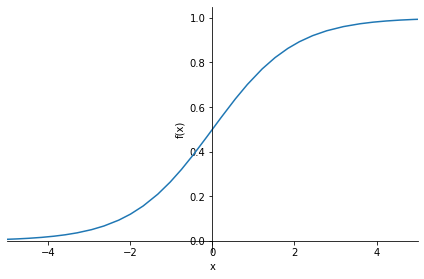

In [200]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [201]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [202]:
coeffs = train_model(lr=150)

0.476; 0.270; 0.267; 0.265; 0.264; 0.262; 0.261; 0.260; 0.258; 0.257; 0.255; 0.253; 0.251; 0.249; 0.247; 0.245; 0.244; 0.243; 0.242; 0.241; 0.240; 0.240; 0.239; 0.238; 0.238; 0.238; 0.237; 0.237; 0.236; 0.236; 0.236; 0.236; 0.235; 0.235; 0.235; 0.235; 0.234; 0.234; 0.234; 0.234; 

In [203]:
acc(coeffs)

tensor(0.7699)

In [204]:
show_coeffs()

{'Age': tensor(-2.1040),
 'LogRoomService': tensor(-8.4988),
 'LogShoppingMall': tensor(2.3512),
 'LogFoodCourt': tensor(4.4205),
 'LogSpa': tensor(-8.8721),
 'LogVRDeck': tensor(-8.7925),
 'CryoSleep': tensor(8.5306),
 'VIP': tensor(0.3620),
 'HomePlanet_Earth': tensor(-0.0243),
 'HomePlanet_Europa': tensor(3.8416),
 'HomePlanet_Mars': tensor(0.8876),
 'Destination_55 Cancri e': tensor(2.3509),
 'Destination_PSO J318.5-22': tensor(1.5589),
 'Destination_TRAPPIST-1e': tensor(1.5112)}

## Using matrix product

In [205]:
(val_indep*coeffs).sum(axis=1)

tensor([ -2.3622,   9.7842,   1.4813,  13.2050,   1.4150,  -7.0400,   4.6071,  ...,   0.9991, -10.1047,  -8.5508,   9.3784,   9.8109,
         -3.7199,  14.0307])

In [206]:
val_indep@coeffs

tensor([ -2.3622,   9.7842,   1.4813,  13.2050,   1.4150,  -7.0400,   4.6071,  ...,   0.9991, -10.1047,  -8.5508,   9.3784,   9.8109,
         -3.7199,  14.0307])

In [207]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [208]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [209]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [210]:
coeffs = train_model(lr=100)

0.499; 0.275; 0.271; 0.270; 0.268; 0.267; 0.265; 0.264; 0.263; 0.261; 0.260; 0.258; 0.257; 0.255; 0.253; 0.252; 0.250; 0.249; 0.248; 0.247; 0.246; 0.245; 0.244; 0.243; 0.243; 0.242; 0.242; 0.241; 0.241; 0.240; 0.240; 0.239; 0.239; 0.239; 0.238; 0.238; 0.238; 0.238; 0.237; 0.237; 

In [211]:
acc(coeffs)

tensor(0.7658)

In [212]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [213]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [214]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [215]:
coeffs = train_model(lr=1.8)

0.500; 0.492; 0.481; 0.469; 0.457; 0.445; 0.433; 0.422; 0.411; 0.400; 0.388; 0.376; 0.363; 0.351; 0.339; 0.329; 0.320; 0.313; 0.306; 0.301; 0.297; 0.294; 0.291; 0.288; 0.286; 0.284; 0.283; 0.281; 0.280; 0.279; 0.278; 0.277; 0.276; 0.275; 0.274; 0.273; 0.273; 0.272; 0.271; 0.271; 

In [216]:
coeffs = train_model(lr=30)

0.500; 0.429; 0.298; 0.271; 0.266; 0.262; 0.259; 0.264; 0.247; 0.243; 0.258; 0.239; 0.255; 0.237; 0.256; 0.232; 0.231; 0.233; 0.241; 0.266; 0.246; 0.230; 0.230; 0.231; 0.237; 0.230; 0.233; 0.230; 0.232; 0.229; 0.231; 0.229; 0.229; 0.228; 0.228; 0.227; 0.227; 0.227; 0.227; 0.227; 

## A neural network

In [217]:
def init_coeffs():
    hiddens = [20, 20]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [218]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [219]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [220]:
coeffs = train_model(lr=5)

0.513; 0.496; 0.496; 0.496; 0.496; 0.495; 0.495; 0.494; 0.468; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 0.500; 

In [221]:
acc(coeffs)

tensor(0.5017)